In [101]:
%matplotlib inline

import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [102]:
input_file = "../../data/synthetic_fishing_data.csv"
output_path = "../../data/synthetic_fishing/"

In [103]:
def split_dataset(data, train_years=2, validate_years=1, test_years=1):
    """
    Splits the dataset into training, validation, and testing sets based on the number of years.

    Parameters:
        data (pd.DataFrame): The dataset with a 'Date' column.
        train_years (int): Number of years for the training set.
        validate_years (int): Number of years for the validation set.
        test_years (int): Number of years for the test set.

    Returns:
        tuple: Three DataFrames (train, validate, test).
    """
    # Ensure the Date column is in datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.sort_values('Date')

    # Define the split dates
    train_end_date = data['Date'].min() + pd.DateOffset(years=train_years)
    validate_end_date = train_end_date + pd.DateOffset(years=validate_years)
    test_end_date = validate_end_date + pd.DateOffset(years=test_years)

    # Create subsets
    train = data[data['Date'] < train_end_date]
    validate = data[(data['Date'] >= train_end_date) & (data['Date'] < validate_end_date)]
    test = data[(data['Date'] >= validate_end_date) & (data['Date'] < test_end_date)]

    return train, validate, test

In [104]:
def run_split(input):
    # Ensure the output directory exists
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    # Load the generated dataset
    dataset = pd.read_csv(input)

    # Split the dataset into train, validate, and test
    train, validate, test = split_dataset(dataset)

    # Save each split to a CSV file
    train.to_csv(f"{output_path}fishing_train.csv", index=False)
    validate.to_csv(f"{output_path}fishing_validate.csv", index=False)
    test.to_csv(f"{output_path}fishing_test.csv", index=False)

    print("Dataset successfully split and saved:")
    print(f"Train Set: {train.shape[0]} rows")
    print(f"Validation Set: {validate.shape[0]} rows")
    print(f"Test Set: {test.shape[0]} rows")

In [105]:
run_split(input_file)

Dataset successfully split and saved:
Train Set: 731 rows
Validation Set: 365 rows
Test Set: 365 rows


In [106]:
full_data = pd.read_csv(input_file, index_col=0)


In [107]:
full_data.describe()

,Sunlight Hours,Wind Speed (km/h),Water Temperature (°C),Water Clarity (index),Dissolved Oxygen (mg/L),Ammonia Level (mg/L),Nitrate Level (mg/L),pH Level,Fish Density (fish/m³),Feed Rate (kg/day),Yield (kg)
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,12.000033,5.044981,20.191253,2.440142,13.993826,5.705774,28.572266,7.213246,8.375233,4.834669,88.890920
std,1.413823,2.070806,3.685279,0.199134,1.534891,0.594985,0.437790,0.358957,0.484256,0.393133,17.626759
min,10.000000,-0.920000,14.210000,1.890000,8.660000,4.300000,27.050000,6.020000,6.540000,3.590000,40.090000
25%,10.590000,3.550000,16.520000,2.290000,12.900000,5.230000,28.270000,6.950000,8.030000,4.560000,76.355000
50%,12.000000,5.020000,20.150000,2.440000,14.020000,5.690000,28.570000,7.220000,8.380000,4.850000,88.900000
75%,13.410000,6.525000,23.825000,2.590000,15.080000,6.200000,28.880000,7.470000,8.730000,5.110000,101.485000
max,14.000000,11.800000,26.410000,2.990000,18.730000,7.140000,30.410000,8.400000,9.940000,6.060000,137.610000


In [108]:
full_data.columns

Index(['Sunlight Hours', 'Wind Speed (km/h)', 'Water Temperature (°C)',
       'Water Clarity (index)', 'Dissolved Oxygen (mg/L)',
       'Ammonia Level (mg/L)', 'Nitrate Level (mg/L)', 'pH Level',
       'Fish Density (fish/m³)', 'Feed Rate (kg/day)', 'Yield (kg)'],
      dtype='object')

In [109]:
full_data.info

<bound method DataFrame.info of             Sunlight Hours  Wind Speed (km/h)  Water Temperature (°C)  \
Date                                                                    
2020-01-01           12.03               3.11                   20.67   
2020-01-02           12.07               8.89                   19.60   
2020-01-03           12.10               8.66                   19.74   
2020-01-04           12.14               6.91                   20.18   
2020-01-05           12.17               7.66                   20.11   
...                    ...                ...                     ...   
2024-12-27           11.90               8.07                   19.32   
2024-12-28           11.93               4.42                   20.14   
2024-12-29           11.97               7.84                   19.54   
2024-12-30           12.00               5.14                   20.17   
2024-12-31           12.03               5.94                   20.10   

            Water 

In [110]:
full_data.head()

,Sunlight Hours,Wind Speed (km/h),Water Temperature (°C),Water Clarity (index),Dissolved Oxygen (mg/L),Ammonia Level (mg/L),Nitrate Level (mg/L),pH Level,Fish Density (fish/m³),Feed Rate (kg/day),Yield (kg)
Date,,,,,,,,,,,
2020-01-01,12.03,3.11,20.67,2.43,14.68,5.39,28.24,7.47,8.71,5.27,78.85
2020-01-02,12.07,8.89,19.60,2.19,15.27,5.87,28.20,7.47,8.55,4.44,77.09
2020-01-03,12.10,8.66,19.74,2.28,14.67,5.98,28.45,7.50,8.37,4.39,64.50
2020-01-04,12.14,6.91,20.18,2.24,14.01,5.96,28.63,7.31,8.26,4.63,58.76
2020-01-05,12.17,7.66,20.11,2.20,13.57,6.14,28.82,6.98,8.07,4.30,83.75


In [111]:
full_data.tail()

,Sunlight Hours,Wind Speed (km/h),Water Temperature (°C),Water Clarity (index),Dissolved Oxygen (mg/L),Ammonia Level (mg/L),Nitrate Level (mg/L),pH Level,Fish Density (fish/m³),Feed Rate (kg/day),Yield (kg)
Date,,,,,,,,,,,
2024-12-27,11.90,8.07,19.32,2.38,13.26,6.10,28.94,7.07,7.96,4.26,108.76
2024-12-28,11.93,4.42,20.14,2.71,12.31,5.95,29.23,6.72,7.88,4.57,113.73
2024-12-29,11.97,7.84,19.54,2.45,15.89,5.59,27.96,7.64,8.82,4.63,106.72
2024-12-30,12.00,5.14,20.17,2.32,11.63,6.19,29.45,6.68,7.61,4.54,98.77
2024-12-31,12.03,5.94,20.10,2.39,13.60,5.89,28.75,7.12,8.19,4.59,104.55


In [112]:
df = full_data.copy()

In [113]:
l, sh, dim, siz = len(df), df.shape, df.ndim, df.size

In [114]:
print(l, sh, dim, siz)

1827 (1827, 11) 2 20097


In [115]:
rdf = df.to_numpy().reshape(df.shape[0], df.shape[1], 1)
rdf.shape

(1827, 11, 1)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

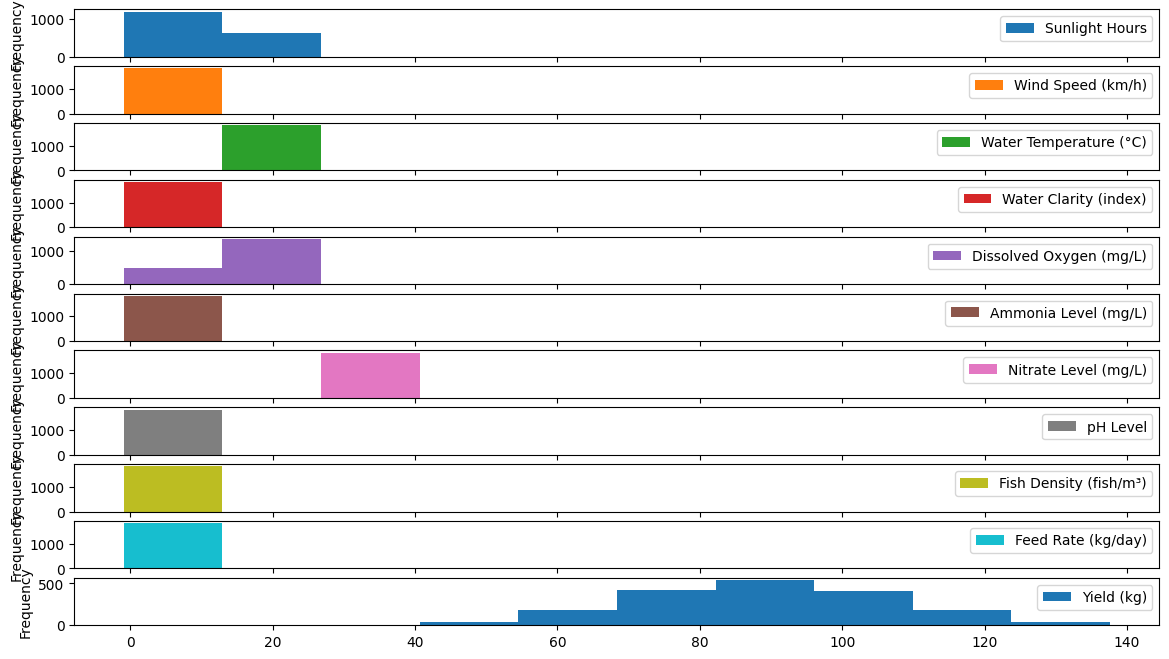

In [116]:
df.plot(kind='hist', subplots=True, figsize=(14, 8))

array([[<Axes: title={'center': 'Sunlight Hours'}>,
        <Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Water Temperature (°C)'}>],
       [<Axes: title={'center': 'Water Clarity (index)'}>,
        <Axes: title={'center': 'Dissolved Oxygen (mg/L)'}>,
        <Axes: title={'center': 'Ammonia Level (mg/L)'}>],
       [<Axes: title={'center': 'Nitrate Level (mg/L)'}>,
        <Axes: title={'center': 'pH Level'}>,
        <Axes: title={'center': 'Fish Density (fish/m³)'}>],
       [<Axes: title={'center': 'Feed Rate (kg/day)'}>,
        <Axes: title={'center': 'Yield (kg)'}>, <Axes: >]], dtype=object)

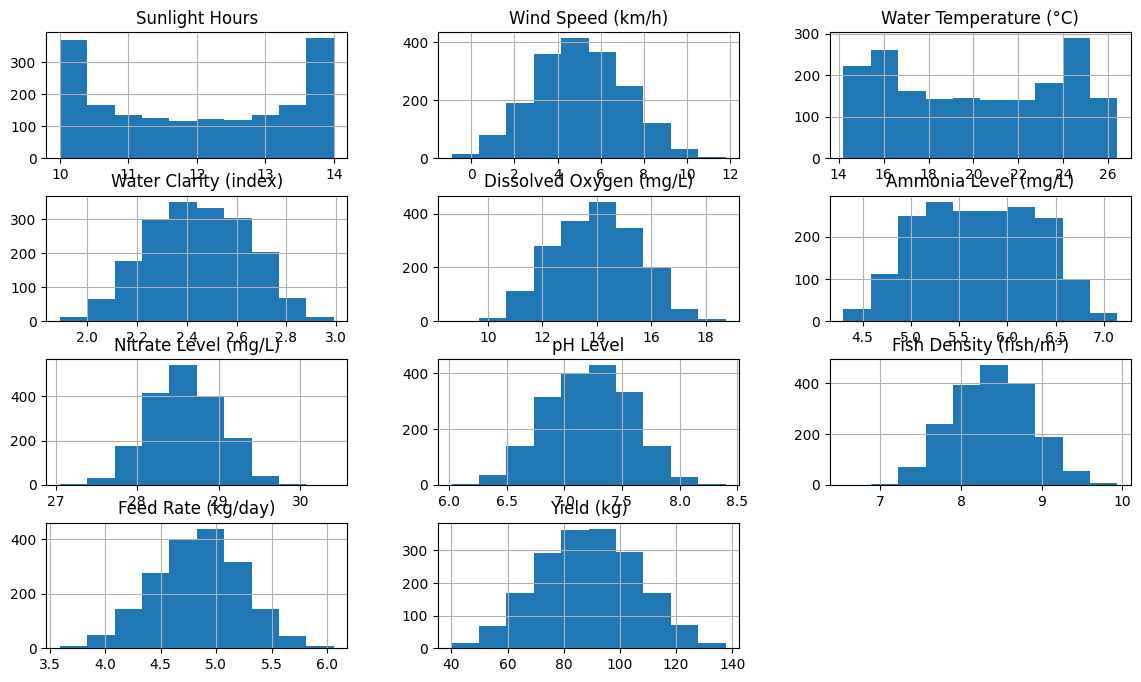

In [117]:
df.hist(figsize=(14, 8))

<Axes: xlabel='pH Level', ylabel='Yield (kg)'>

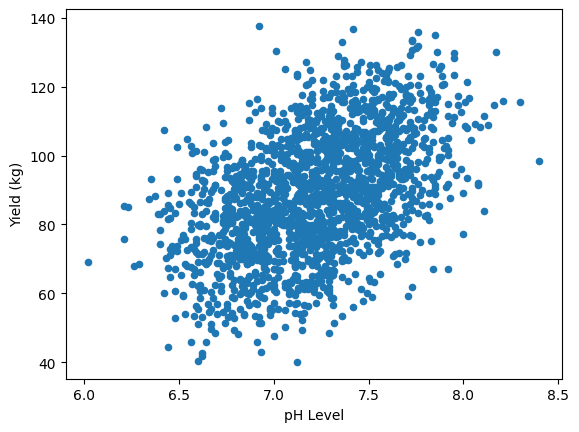

In [118]:
df.plot.scatter(x="pH Level", y="Yield (kg)")


<Axes: xlabel='Dissolved Oxygen (mg/L)', ylabel='Yield (kg)'>

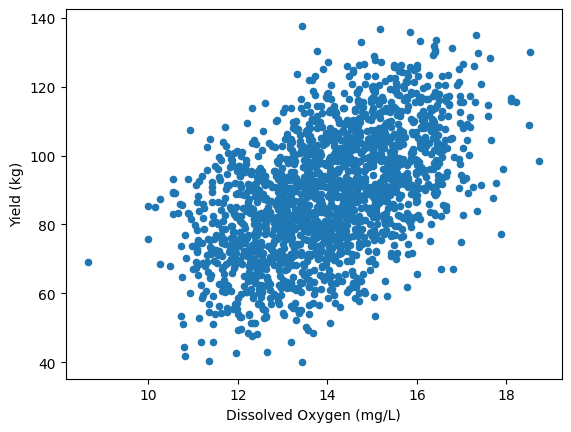

In [119]:
df.plot.scatter(x="Dissolved Oxygen (mg/L)", y="Yield (kg)")

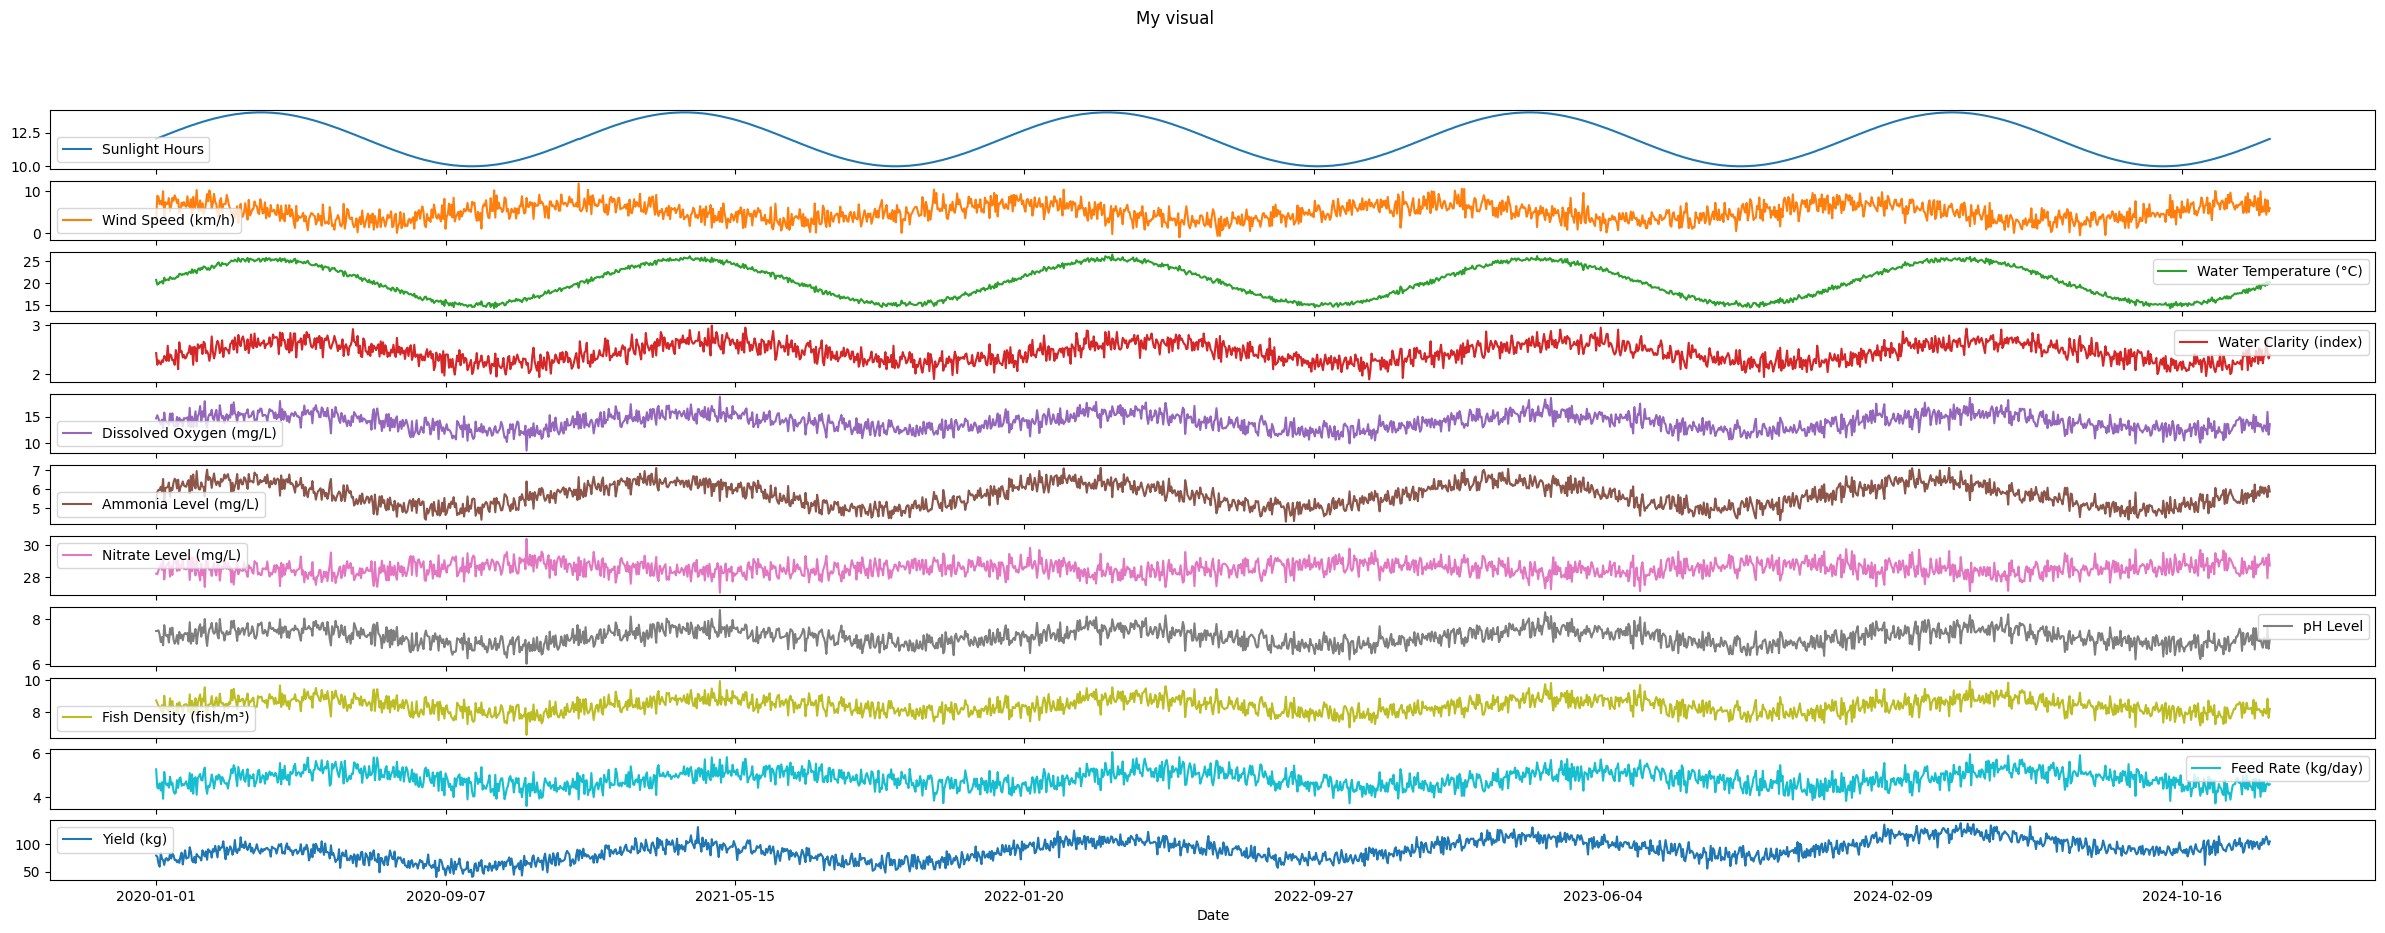

In [120]:
df.plot(subplots=True, figsize=(30, 10), title="My visual")
plt.show()

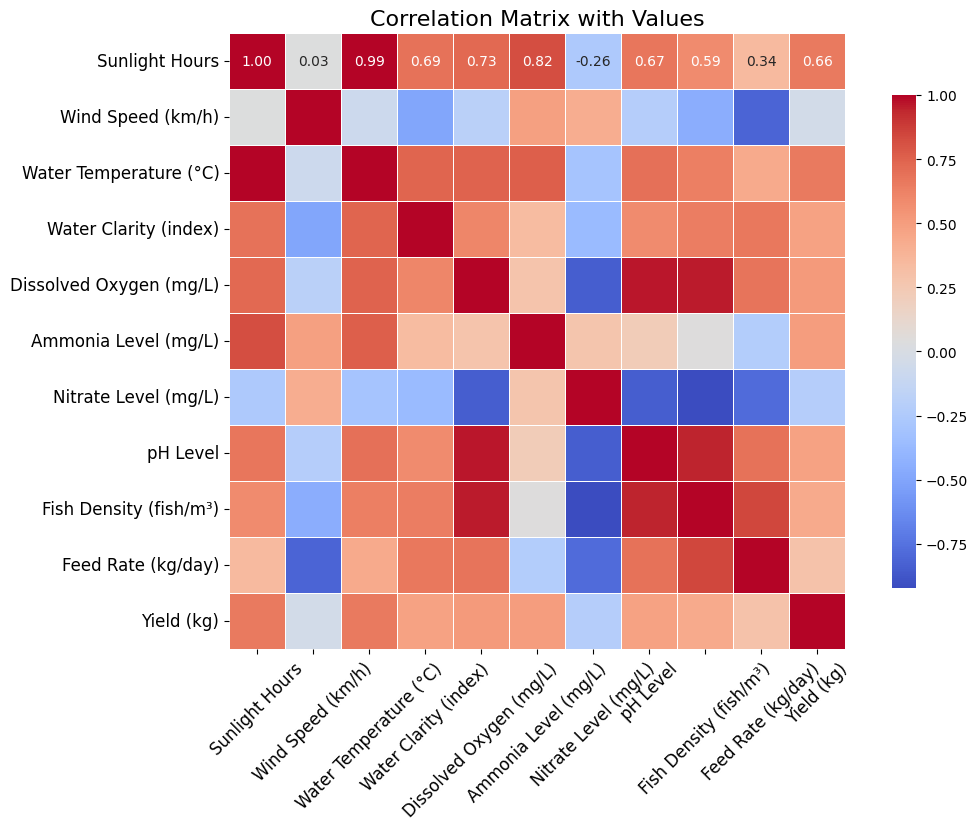

In [125]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values on the heatmap
    fmt=".2f",             # Format values to 2 decimal places
    cmap="coolwarm",       # Diverging color map (red = negative, blue = positive)
    square=True,           # Keep cells square-shaped
    linewidths=0.5,        # Add clear grid lines between cells
    cbar_kws={"shrink": 0.8}  # Shrink the color bar
)

# Add labels and a title
plt.title("Correlation Matrix with Values", fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.show()